<a href="https://colab.research.google.com/github/Avina20/CIFAR-10-with-VGG/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Found GPU at: /device:GPU:0


In [2]:
print(tf.__version__)

2.2.0-rc2


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0, x_test/255.0
print('Shape of x_train', x_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
Shape of x_train (50000, 32, 32, 3)


In [5]:
print('Shape of y_train',y_train.shape)
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train))
print('Number of classes', K)

Shape of y_train (50000, 1)
Number of classes 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [8]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=30)

Epoch 1/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8932 - accuracy: 0.6916 - val_loss: 0.8851 - val_accuracy: 0.6943
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7021 - accuracy: 0.7576 - val_loss: 0.9163 - val_accuracy: 0.6953
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5810 - accuracy: 0.7994 - val_loss: 0.7251 - val_accuracy: 0.7609
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4899 - accuracy: 0.8308 - val_loss: 0.6378 - val_accuracy: 0.7851
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4092 - accuracy: 0.8591 - val_loss: 0.6640 - val_accuracy: 0.7854
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3495 - accuracy: 0.8798 - val_loss: 0.5941 - val_accuracy: 0.8165
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2867 - accuracy: 0.9004 - val_loss: 0.6730 - val_ac

In [17]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]
r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=500, epochs=10)

Epoch 1/10
500/500 [==============================] - 10s 20ms/step - loss: 0.3684 - accuracy: 0.8772 - val_loss: 0.4421 - val_accuracy: 0.8538
Epoch 2/10
500/500 [==============================] - 9s 18ms/step - loss: 0.3495 - accuracy: 0.8822 - val_loss: 0.4217 - val_accuracy: 0.8616
Epoch 3/10
500/500 [==============================] - 10s 19ms/step - loss: 0.3345 - accuracy: 0.8865 - val_loss: 0.4197 - val_accuracy: 0.8604
Epoch 4/10
500/500 [==============================] - 9s 19ms/step - loss: 0.3210 - accuracy: 0.8901 - val_loss: 0.4157 - val_accuracy: 0.8670
Epoch 5/10
500/500 [==============================] - 9s 19ms/step - loss: 0.3379 - accuracy: 0.8844 - val_loss: 0.4427 - val_accuracy: 0.8580
Epoch 6/10
500/500 [==============================] - 9s 19ms/step - loss: 0.3215 - accuracy: 0.8897 - val_loss: 0.4224 - val_accuracy: 0.8629
Epoch 7/10
500/500 [==============================] - 10s 19ms/step - loss: 0.3185 - accuracy: 0.8889 - val_loss: 0.4892 - val_accuracy: 0.8

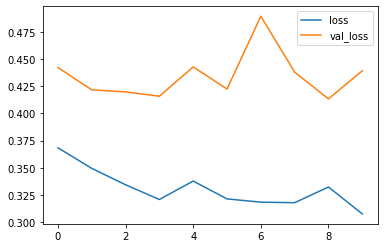

In [18]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

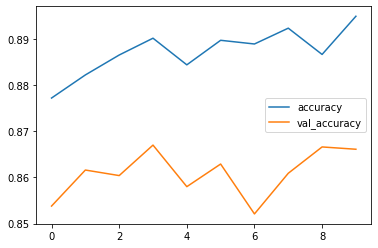

In [19]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[872  11  27  10   5   5   4  10  22  34]
 [  2 948   0   0   0   0   0   2   4  44]
 [ 30   8 744  38  33  53  59  21   3  11]
 [  9   8  33 712  26 100  52  39   5  16]
 [  7   2  23  29 842  18  38  38   2   1]
 [  3   2  10  70  25 830  14  39   1   6]
 [  3   6  10  18   7   8 941   4   0   3]
 [  5   0   4   8  15  29   2 936   0   1]
 [ 39  17   2   5   2   3   3   4 893  32]
 [  4  37   2   1   0   1   2   5   5 943]]


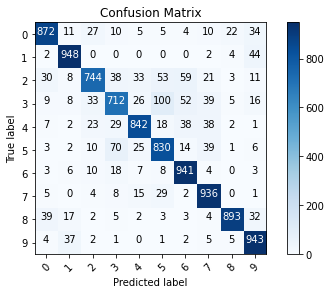

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))    
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize  else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

Text(0.5, 1.0, 'True label: horse Predicted label: dog')

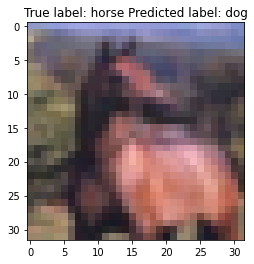

In [22]:
misclassified_ind = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_ind)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted label: %s' %(labels[y_test[i]], labels[p_test[i]]))